In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# scipy imports
import scipy.stats as stats

# sklearn imports
from sklearn.linear_model import LinearRegression

In [2]:
# load data
snow_df = pd.read_csv('snotel-data/snotel_680_park_cone.csv',header=58) 

In [3]:
snow_df.columns = ['date', 'swe_start_in',
       'precip_start_in',
       'airtemp_max_F', 'airtemp_min_F',
       'airtemp_mean_F', 'precip_incr_in']

In [4]:
# datetime operations
snow_df['dt'] = pd.to_datetime(snow_df['date'])
snow_df['year'] = snow_df['dt'].dt.year

In [5]:
#snow_df.describe()

In [6]:
# remove rows with swe=0
snow_df.drop(snow_df[snow_df.swe_start_in == 0].index, inplace=True)

In [7]:
# annual peak swe
peak_swe = snow_df.groupby(snow_df.year)['swe_start_in'].max()

In [8]:
# annual sum swe
sum_swe = snow_df.groupby(snow_df.year)['swe_start_in'].cumsum()

In [9]:
# Q data
q_df = pd.read_csv('q-data/gunnison_delta.csv',sep='\t',header=32)

In [10]:
q_df.columns = ['USGS', 'id', 'dt_string', 'tz', 'cfs', 'junk']

In [11]:
# datetime operations
q_df['dt'] = pd.to_datetime(q_df['dt_string'])
q_df['year'] = q_df['dt'].dt.year
q_df['month'] = q_df['dt'].dt.month
q_df['day'] = q_df['dt'].dt.day



In [12]:
# new datetime without time
q_df['timestamp'] = pd.to_datetime(q_df[['year','month', 'day']], errors='coerce')

In [13]:
q_df.head()

,USGS,id,dt_string,tz,cfs,junk,dt,year,month,day,timestamp
0,USGS,9144250,1985-11-04 00:00,MST,2400.0,A:[91],1985-11-04 00:00:00,1985,11,4,1985-11-04
1,USGS,9144250,1985-11-04 00:15,MST,2400.0,A:[91],1985-11-04 00:15:00,1985,11,4,1985-11-04
2,USGS,9144250,1985-11-04 00:30,MST,2400.0,A:[91],1985-11-04 00:30:00,1985,11,4,1985-11-04
3,USGS,9144250,1985-11-04 00:45,MST,2400.0,A:[91],1985-11-04 00:45:00,1985,11,4,1985-11-04
4,USGS,9144250,1985-11-04 01:00,MST,2400.0,A:[91],1985-11-04 01:00:00,1985,11,4,1985-11-04


In [14]:
# make series from groupby, this has timestamp as index
daily_q = q_df.groupby(['timestamp'])['cfs'].mean()

In [15]:
# make df from series
daily_q_df = pd.DataFrame(daily_q)

In [16]:
daily_q_df.head()

,cfs
timestamp,
1985-11-04,2400.625000
1985-11-05,2391.250000
1985-11-06,2400.729167
1985-11-07,2364.166667
1985-11-08,2390.625000


In [17]:
# annual peak Q
peak_q = q_df.groupby(q_df.year)['cfs'].max()

In [18]:
# cumulative Q
sum_q = q_df.groupby(q_df.year)['cfs'].cumsum()

In [19]:
# set index and merge

In [20]:
q_df.head()

,USGS,id,dt_string,tz,cfs,junk,dt,year,month,day,timestamp
0,USGS,9144250,1985-11-04 00:00,MST,2400.0,A:[91],1985-11-04 00:00:00,1985,11,4,1985-11-04
1,USGS,9144250,1985-11-04 00:15,MST,2400.0,A:[91],1985-11-04 00:15:00,1985,11,4,1985-11-04
2,USGS,9144250,1985-11-04 00:30,MST,2400.0,A:[91],1985-11-04 00:30:00,1985,11,4,1985-11-04
3,USGS,9144250,1985-11-04 00:45,MST,2400.0,A:[91],1985-11-04 00:45:00,1985,11,4,1985-11-04
4,USGS,9144250,1985-11-04 01:00,MST,2400.0,A:[91],1985-11-04 01:00:00,1985,11,4,1985-11-04


In [21]:
snow_df.head()

,date,swe_start_in,precip_start_in,airtemp_max_F,airtemp_min_F,airtemp_mean_F,precip_incr_in,dt,year
0,1980-03-30,NaN,2.0,NaN,NaN,NaN,NaN,1980-03-30,1980
1,1980-03-31,NaN,NaN,NaN,NaN,NaN,NaN,1980-03-31,1980
2,1980-04-01,NaN,NaN,NaN,NaN,NaN,NaN,1980-04-01,1980
3,1980-04-02,NaN,NaN,NaN,NaN,NaN,NaN,1980-04-02,1980
4,1980-04-03,NaN,NaN,NaN,NaN,NaN,NaN,1980-04-03,1980


In [22]:
#set snow df index to dt
snow_df.set_index(snow_df.dt, inplace=True)

In [23]:
daily_q_df.head()

,cfs
timestamp,
1985-11-04,2400.625000
1985-11-05,2391.250000
1985-11-06,2400.729167
1985-11-07,2364.166667
1985-11-08,2390.625000


In [24]:
# merge datasets
data = pd.merge(snow_df, daily_q_df, how='left', left_index=True, right_index=True)

In [25]:
data.head()

,date,swe_start_in,precip_start_in,airtemp_max_F,airtemp_min_F,airtemp_mean_F,precip_incr_in,dt,year,cfs
dt,,,,,,,,,,
1980-03-30,1980-03-30,NaN,2.0,NaN,NaN,NaN,NaN,1980-03-30,1980,NaN
1980-03-31,1980-03-31,NaN,NaN,NaN,NaN,NaN,NaN,1980-03-31,1980,NaN
1980-04-01,1980-04-01,NaN,NaN,NaN,NaN,NaN,NaN,1980-04-01,1980,NaN
1980-04-02,1980-04-02,NaN,NaN,NaN,NaN,NaN,NaN,1980-04-02,1980,NaN
1980-04-03,1980-04-03,NaN,NaN,NaN,NaN,NaN,NaN,1980-04-03,1980,NaN


In [26]:
data.cfs.describe()

count     5684.000000
mean      1582.840724
std       1373.121330
min        294.708333
25%        804.390625
50%       1103.051862
75%       1888.619792
max      15335.416667
Name: cfs, dtype: float64

In [27]:
# remove nan rows
data_clean = data.dropna()

In [28]:
# regression
X = data_clean[['swe_start_in','airtemp_min_F','airtemp_max_F']]
y = data_clean['cfs']

model = LinearRegression()
model.fit(X,y)
y_hat = model.predict(X)

ValueError: x and y must have same first dimension, but have shapes (5529,) and (75,)

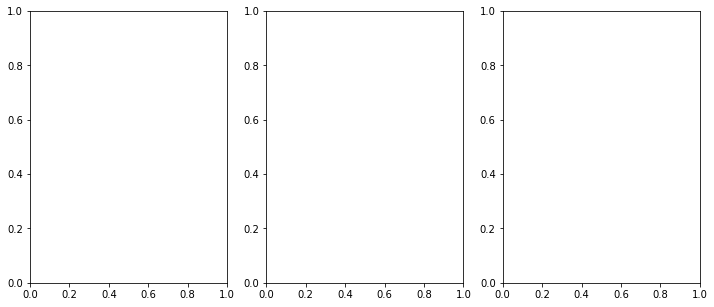

In [61]:
# plot predictions
# plots swe A, B
fig, ax = plt.subplots(1,3,figsize=(12,5));
ax[0].plot(data_clean.swe_start_in,y,'bo',alpha=0.1)
ax[0].set_ylabel('q (cfs)');
ax[0].set_xlabel('swe(in)')
ax[0].plot(data_clean.swe_start_in,y_hat,'ko',alpha=0.1)

ax[1].plot(data_clean.airtemp_min_F,y,'bo',alpha=0.1)
ax[1].set_ylabel('q (cfs)');
ax[1].set_xlabel('min airtemp (F)')
ax[1].plot(data_clean.airtemp_min_F,y_hat,'ko',alpha=0.1)

ax[2].plot(data_clean.airtemp_max_F,y,'bo',alpha=0.1)
ax[2].set_ylabel('q (cfs)');
ax[2].set_xlabel('max airtemp (F)')
ax[2].plot(data_clean.airtemp_max_F,y_hat,'ko',alpha=0.1)

In [31]:
# clean outliers (drop rows)
df = data_clean
# clear min airtemp outliers
df.drop(df[df.airtemp_min_F >= 65].index, inplace=True)
# clear max airtemp outliers
df.drop(df[df.airtemp_max_F >= 100].index, inplace=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
data_clean = df

In [33]:
data_clean.head()

,date,swe_start_in,precip_start_in,airtemp_max_F,airtemp_min_F,airtemp_mean_F,precip_incr_in,dt,year,cfs
dt,,,,,,,,,,
1985-12-12,1985-12-12,6.9,7.4,30.0,-33.0,-5.0,0.0,1985-12-12,1985,2512.395833
1985-12-15,1985-12-15,6.8,7.4,36.0,-18.0,3.0,0.0,1985-12-15,1985,2709.687500
1985-12-16,1985-12-16,6.8,7.4,36.0,-9.0,10.0,0.0,1985-12-16,1985,2708.854167
1985-12-26,1985-12-26,6.7,7.4,36.0,-12.0,9.0,0.0,1985-12-26,1985,2710.416667
1985-12-29,1985-12-29,6.7,7.4,40.0,-12.0,10.0,0.0,1985-12-29,1985,2715.520833


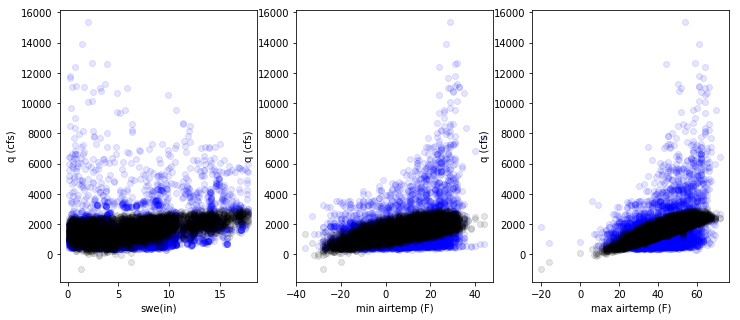

In [34]:
# regression again
X = data_clean[['swe_start_in','airtemp_min_F','airtemp_max_F']]
y = data_clean['cfs']

model = LinearRegression()
model.fit(X,y)
y_hat = model.predict(X)

# plot predictions
# plots swe A, B
fig, ax = plt.subplots(1,3,figsize=(12,5));
ax[0].plot(data_clean.swe_start_in,y,'bo',alpha=0.1)
ax[0].set_ylabel('q (cfs)');
ax[0].set_xlabel('swe(in)')
ax[0].plot(data_clean.swe_start_in,y_hat,'ko',alpha=0.1)

ax[1].plot(data_clean.airtemp_min_F,y,'bo',alpha=0.1)
ax[1].set_ylabel('q (cfs)');
ax[1].set_xlabel('min airtemp (F)')
ax[1].plot(data_clean.airtemp_min_F,y_hat,'ko',alpha=0.1)

ax[2].plot(data_clean.airtemp_max_F,y,'bo',alpha=0.1)
ax[2].set_ylabel('q (cfs)');
ax[2].set_xlabel('max airtemp (F)')
ax[2].plot(data_clean.airtemp_max_F,y_hat,'ko',alpha=0.1)

In [35]:
# here we go further:
# max q per temperature

bins = 100
bins, binvals = pd.cut(data_clean.airtemp_min_F,bins,right=True,retbins=True)

In [36]:
# merge datasets
# data_binned = pd.merge(data_clean, bins, how='left', left_index=True, right_index=True)

data_clean['bins'] = bins.values

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [37]:
#bins

In [38]:
data_clean.head()

,date,swe_start_in,precip_start_in,airtemp_max_F,airtemp_min_F,airtemp_mean_F,precip_incr_in,dt,year,cfs,bins
dt,,,,,,,,,,,
1985-12-12,1985-12-12,6.9,7.4,30.0,-33.0,-5.0,0.0,1985-12-12,1985,2512.395833,"(-33.6, -32.8]"
1985-12-15,1985-12-15,6.8,7.4,36.0,-18.0,3.0,0.0,1985-12-15,1985,2709.687500,"(-18.4, -17.6]"
1985-12-16,1985-12-16,6.8,7.4,36.0,-9.0,10.0,0.0,1985-12-16,1985,2708.854167,"(-9.6, -8.8]"
1985-12-26,1985-12-26,6.7,7.4,36.0,-12.0,9.0,0.0,1985-12-26,1985,2710.416667,"(-12.8, -12.0]"
1985-12-29,1985-12-29,6.7,7.4,40.0,-12.0,10.0,0.0,1985-12-29,1985,2715.520833,"(-12.8, -12.0]"


In [52]:
maxQ_mintemp = data_clean.groupby(data_clean.bins)['cfs'].max()

In [58]:
np.shape(maxQ_mintemp)

(100,)

In [59]:
# data for new regression
meanSWE_mintemp = data_clean.groupby(data_clean.bins)['swe_start_in'].mean()
meanAIR_mintemp = data_clean.groupby(data_clean.bins)['airtemp_min_F'].mean()
data_binned = pd.concat([meanSWE_mintemp,meanAIR_mintemp,maxQ_mintemp], axis=1)


In [60]:
# remove nan rows again
data_clean2 = data_binned.dropna()

In [45]:
data_clean2

,swe_start_in,airtemp_min_F,cfs
bins,,,
"(-36.08, -35.2]",8.700000,-36.0,441.916667
"(-33.6, -32.8]",6.900000,-33.0,2512.395833
"(-32.8, -32.0]",5.200000,-32.0,1328.333333
"(-30.4, -29.6]",3.900000,-30.0,1335.729167
"(-29.6, -28.8]",4.600000,-29.0,809.750000
"(-28.8, -28.0]",5.900000,-28.0,3256.458333
"(-27.2, -26.4]",5.530000,-27.0,1490.000000
"(-26.4, -25.6]",6.166667,-26.0,3129.166667
"(-25.6, -24.8]",4.126316,-25.0,3109.375000


In [46]:

cols = data_clean2.columns
# regression again
X = data_clean2[cols[:2]]
y = data_clean2[cols[-1]]

model = LinearRegression()
model.fit(X,y)
y_hat = model.predict(X)



In [47]:
y

bins
(-36.08, -35.2]      441.916667
(-33.6, -32.8]      2512.395833
(-32.8, -32.0]      1328.333333
(-30.4, -29.6]      1335.729167
(-29.6, -28.8]       809.750000
(-28.8, -28.0]      3256.458333
(-27.2, -26.4]      1490.000000
(-26.4, -25.6]      3129.166667
(-25.6, -24.8]      3109.375000
(-24.8, -24.0]      1810.833333
(-23.2, -22.4]      2723.645833
(-22.4, -21.6]      3513.125000
(-21.6, -20.8]      3510.416667
(-20.8, -20.0]      3431.041667
(-19.2, -18.4]      3447.500000
(-18.4, -17.6]      3147.708333
(-17.6, -16.8]      3534.583333
(-16.8, -16.0]      3534.375000
(-15.2, -14.4]      3150.833333
(-14.4, -13.6]      2634.791667
(-13.6, -12.8]      3140.312500
(-12.8, -12.0]      3522.291667
(-11.2, -10.4]      2389.791667
(-10.4, -9.6]       4221.250000
(-9.6, -8.8]        2708.854167
(-8.8, -8.0]        3987.916667
(-7.2, -6.4]        3470.625000
(-6.4, -5.6]        3554.375000
(-5.6, -4.8]        3574.166667
(-4.8, -4.0]        3181.041667
                       ...     
(11

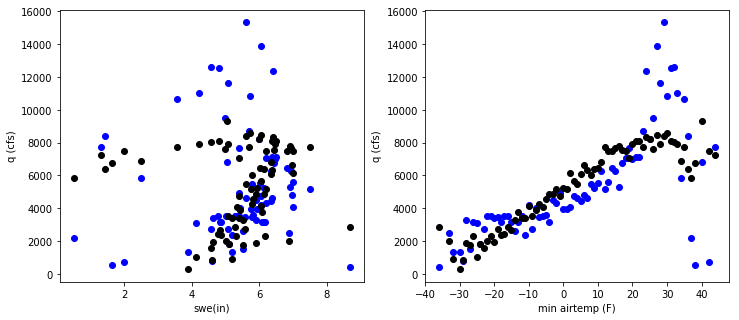

In [48]:
# plot predictions
# plots swe A, B
fig, ax = plt.subplots(1,2,figsize=(12,5));
ax[0].plot(data_clean2.swe_start_in,y,'bo')
ax[0].set_ylabel('q (cfs)');
ax[0].set_xlabel('swe(in)')
ax[0].plot(data_clean2.swe_start_in,y_hat,'ko')

ax[1].plot(data_clean2.airtemp_min_F,y,'bo')
ax[1].set_ylabel('q (cfs)');
ax[1].set_xlabel('min airtemp (F)')
ax[1].plot(data_clean2.airtemp_min_F,y_hat,'ko')

# ax[2].plot(data_clean2.airtemp_max_F,y,'bo')
# ax[2].set_ylabel('q (cfs)');
# ax[2].set_xlabel('max airtemp (F)')
# ax[2].plot(data_clean2.airtemp_max_F,y_hat,'ko')

In [49]:
# R2 score
score = model.score(X,y)
print('R2 = {0:.3f}'.format(score))

R2 = 0.554


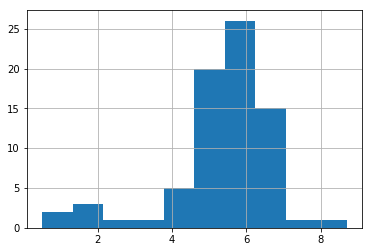

In [50]:
data_clean2.swe_start_in.hist()

In [51]:
# how many zeros?
ones = data_clean2.swe_start_in.values.astype(bool).sum(axis=0)
zeros = len(data_clean2.swe_start_in) - ones
print(zeros)
print(zeros/len(data_clean2.swe_start_in))

0
0.0
